# Hometasks №1

1)Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"

2)Cохранить ее в pandas dataframe

3)Cохранить pandas dataframe в excel

4)Cохранить pandas dataframe в pickle

5)Cохранить pandas dataframe в БД

In [3]:
#подключение необходимых бибилиотек
import requests
import pandas as pd
from tqdm.auto import tqdm

#### 1)Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"

Перейдя на сайт наш.дом.рф(https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/%D0%BA%D0%B0%D1%82%D0%B0%D0%BB%D0%BE%D0%B3-%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BA/%D1%81%D0%BF%D0%B8%D1%81%D0%BE%D0%BA-%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2/%D0%BA%D0%B0%D1%80%D1%82%D0%B0?objStatus=0&bounds=49.19590614644596%2C38.09633812499997%2C70.71641790939553%2C158.15493187499996) обнаружим, что на данный момент каталог новостроек представлен в количестве 10778 объектов.
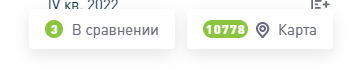

In [4]:
#зададим в цикле количество 10778
offset_ = 0
limit_ = 1000
#формируется список идентификаторов объекта(objId)
sp_id = []
while offset_<10778:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    response = requests.get(url)
    objects_data = response.json()
    objects_list = objects_data.get('data').get('list')
    objids = [x.get('objId') for x in objects_list]
    sp_id+=objids
    offset_+=limit_

In [7]:
#посмотрим на один из объектов и из каких значений он представлен
objects_list[0]

{'hobjId': 42512,
 'objId': 32098,
 'developer': {'devId': 7993,
  'shortName': 'СОЧИСТРОЙ-ИНВЕСТ',
  'fullName': 'СОЧИСТРОЙ-ИНВЕСТ',
  'orgForm': {'id': 4,
   'fullForm': 'Общество с ограниченной ответственностью',
   'shortForm': 'ООО'},
  'devInn': '2320181920'},
 'rpdRegionCd': 23,
 'objAddr': 'г Сочи, район Хостинский, улица Шоссейная',
 'objCommercNm': 'Апартотель "ГОРКА"',
 'objFloorMin': 11,
 'objFloorMax': 11,
 'objElemLivingCnt': 0,
 'objReady100PercDt': '2023-06-30',
 'objSquareLiving': 0.0,
 'objCompensFundFlg': 0,
 'objProblemFlg': 0,
 'latitude': 43.5154,
 'longitude': 39.8649,
 'problemFlag': 'NONE',
 'siteStatus': 'Строящиеся',
 'objGuarantyEscrowFlg': 0,
 'residentialBuildings': 0,
 'rpdNum': '23-001837',
 'pdId': 164251,
 'buildType': 'Нежилое',
 'objStatus': 0}

In [8]:
#количество идентификаторов объектов
#видим, что он совпадает с количеством объектов на сайте, значит извлечение данных прошло успешно
len(sp_id)

10778

#### 2)Cохранить ее в pandas dataframe

In [28]:
# Для скачивания данных по определенному объекту, нужно добавить его идентификатор(id) в конец строки запроса
#сформируем список, содержащий все данные по определенному объекту(ниже идет загрузка данных по 50 объектам) 
spis = []
for id in tqdm(sp_id[:50]):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{id}'
    res = requests.get(url)
    it = res.json()
    spis.append(it)
#для скачивания всех данных для всех объектов(выполняется продолжительное время)
#for id in tqdm(sp_id):
#    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{id}'
#    res = requests.get(url)
#    it = res.json()
#    spis.append(it)    
    
    
df = pd.json_normalize(spis)


  0%|          | 0/50 [00:00<?, ?it/s]

In [29]:
#посмотрим, что из себя представляют данные по объектам
df.head(10)


,errcode,data.id,data.hobjId,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.developerGroupName,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.companyGroupId,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.floorMin,data.floorMax,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.photoRenderDTO,data.objGuarantyEscrowFlg,data.objectType,data.miniUrl,data.residentialBuildings,data.newBuildingId,data.objFloorCnt,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objStatus,data.isAvailableWantLiveHere,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrBicycleLaneFlg,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.objElevatorCargoPassengerCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.objectTransportInfo,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.nameObj,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors,data.transportDistIndex,data.transportDistIndexValue,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.airQualityIndexValue,data.complexShortNm,data.greenAreaIndexValue
0,0,13391,37219,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1541,65.5595,1,0,Элитный,13-12-2022 01:22,"[{'objId': 13391, 'pdId': 28101, 'rpdId': 6674...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37219,12,44,4297.44,26,11.0,16.0,12.0,5.0,44.0,2.0,4.0,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,9.0,1,1,0.0,2.0,2.0,6,0.450622,55893.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13383,39024,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОП

In [30]:
#отобразим все колонки DataFrame
pd.set_option('display.max_columns', None)
df.head()

,errcode,data.id,data.hobjId,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.developerGroupName,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.companyGroupId,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.floorMin,data.floorMax,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.photoRenderDTO,data.objGuarantyEscrowFlg,data.objectType,data.miniUrl,data.residentialBuildings,data.newBuildingId,data.objFloorCnt,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objStatus,data.isAvailableWantLiveHere,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrBicycleLaneFlg,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.objElevatorCargoPassengerCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.objectTransportInfo,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.nameObj,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors,data.transportDistIndex,data.transportDistIndexValue,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.airQualityIndexValue,data.complexShortNm,data.greenAreaIndexValue
0,0,13391,37219,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1541,65.5595,1,0,Элитный,13-12-2022 01:22,"[{'objId': 13391, 'pdId': 28101, 'rpdId': 6674...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37219,12,44,4297.44,26,11.0,16.0,12.0,5.0,44.0,2.0,4.0,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,9.0,1,1,0.0,2.0,2.0,6,0.450622,55893.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13383,39024,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОП

In [31]:
#удалим из df колонку errcode, так как для дальнейшего анализа она не нужна
df = df.drop(['errcode'],axis=1)
df.head()

,data.id,data.hobjId,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.developerGroupName,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.companyGroupId,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.floorMin,data.floorMax,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.photoRenderDTO,data.objGuarantyEscrowFlg,data.objectType,data.miniUrl,data.residentialBuildings,data.newBuildingId,data.objFloorCnt,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objStatus,data.isAvailableWantLiveHere,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrBicycleLaneFlg,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.objElevatorCargoPassengerCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.objectTransportInfo,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.nameObj,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors,data.transportDistIndex,data.transportDistIndexValue,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.airQualityIndexValue,data.complexShortNm,data.greenAreaIndexValue
0,13391,37219,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1541,65.5595,1,0,Элитный,13-12-2022 01:22,"[{'objId': 13391, 'pdId': 28101, 'rpdId': 6674...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37219,12,44,4297.44,26,11.0,16.0,12.0,5.0,44.0,2.0,4.0,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,9.0,1,1,0.0,2.0,2.0,6,0.450622,55893.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,39024,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акцио

#### 3)Cохранить pandas dataframe в excel

In [32]:
df.to_excel("DF_House.xlsx")  

#### 4)Cохранить pandas dataframe в pickle

In [35]:
df.to_pickle("./df_House.pkl")

#### 5)Cохранить pandas dataframe в БД

In [41]:
#импортирую библиотеку
import sqlite3


In [42]:
#создание соединения
conn = sqlite3.connect('DF_House_sql')

In [46]:
df = df.applymap(str)

In [48]:
df.to_sql("DF_House_sql", con=conn, if_exists="append", index=False)

50

In [40]:
conn.close()